In [1]:
from joblib import Parallel, delayed
from optimize import *
import time
cmap = plt.get_cmap('viridis')


In [2]:
configuraciones = ['--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.25 --prob_ini 0.1',
                    '--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.75 --prob_mu 0.5 --prob_ini 0.25',
                    '--cr hun --mu bfo --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.25',
                    '--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.1',
                    '--cr un --mu bfo --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.1']

In [3]:
instance_id = '4'
instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'

output = 'Results/testPerformance'+instance_id
testPerformance = dict([i, {'hv':[], 'res':[], 'time':[]}] for i in range(len(configuraciones)))
plot_performance = True
plot_time = False
plot_performance_multi = True

## Celda para ejecutar el análisis desde cero
En esta celda se realizan las 20 ejecuciones de cada configuración para la instancia establecida arriba

In [4]:
if False:
    for i,p in enumerate(configuraciones):
        
        for ejec in range(20):
            seed = str(ejec*308)
            
            # Extra whitespace around options is important!
            parameters = ' -i ' + instance + ' --seed ' + seed + ' ' + p

            ini = time.time()
            hv, res = exec_algorithm(parameters, returnData=True, timeout=10)
            fin = time.time()
            
            testPerformance[i]['hv'].append(hv)
            testPerformance[i]['res'].append(res)
            testPerformance[i]['time'].append(fin - ini)
            
            finish = ['ok','fail'][res == -1]
            
            linea = str(i) + ' ' + str(ejec) + ' ' + str(hv) + ' ' + str(fin - ini) + ' ' + finish + '\n'
            with open(output + '.txt', 'a') as file:
                file.write(linea)
                
            with open(output+'.pkl', 'wb') as f:  
                pickle.dump(testPerformance, f)
                f.close()
            
            print(linea)

## Celda para cargar el análisis previo
PAra no volver a ejecutar desde cero el análisis, se carga la información del archivo pickle.

In [5]:
with open('Results/testPerformance' + instance_id+ '.pkl', 'rb') as f:
    testPerformance = pickle.load(f) 
    f.close()

### Cargar datos de irace
En caso de ser de utilidad

In [6]:
irace = pd.read_csv('../ajuste/export/export.csv')
irace.pop('Unnamed: 0')

ejecs = irace[irace['instancename'] == 'Instance_' + instance_id]
ejecs = ejecs[ejecs['type']=='regular']
ejecs = ejecs[ejecs['value'] <= 0.99]
otras_conf = ejecs['value'].to_list()
otras_conf_color = ejecs['id'].to_list()
bkv = ejecs['bkv'].to_list()[0]

## Graficar el desempeño por instancia

/tmp/ipykernel_11752/2316191445.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([i+1]*len(testPerformance[i]['hv']), testPerformance[i]['hv'],


0.4374272791254866


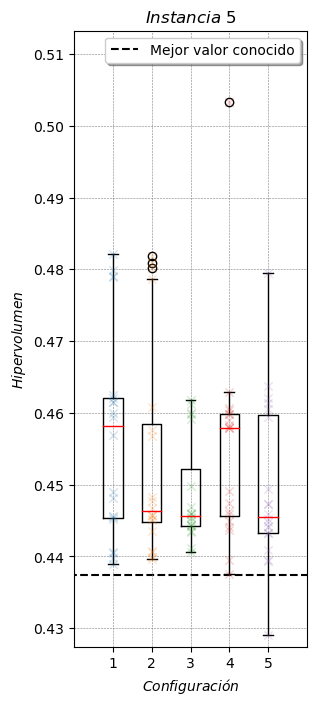

In [7]:
if plot_performance:
    fig, ax = plt.subplots(figsize=(3, 8))

    # Coordenadas x para las barras
    ind = len(testPerformance)

    # Ancho de las barras
    ancho_barra = 0.5

    hipervolumenes = [testPerformance[i]['hv'] for i in range(ind)]

    tiempos = [np.mean(testPerformance[i]['time']) for i in range(ind)]

    ax.boxplot(hipervolumenes,widths=ancho_barra, showfliers=True, zorder = 3, 
            medianprops=dict(color=(1,0,0,1)), )
    # ax.scatter([0]*len(otras_conf), otras_conf, c=otras_conf_color, cmap='viridis', 
    #            marker='s', zorder = 3, alpha=0.2, linewidths=0, label='Configuraciones regulares')
    for i in range(ind):
        ax.scatter([i+1]*len(testPerformance[i]['hv']), testPerformance[i]['hv'], 
                cmap='viridis', marker='x', zorder = 3, alpha=0.2, linewidths=1)

    ax.plot([-1,6], [bkv,bkv], '--', color='black', zorder = 0, label='Mejor valor conocido')

    # Configuración de ejes y etiquetas
    ax.set_xlabel('$Configuración$')
    ax.set_ylabel('$Hipervolumen$')
    ax.set_title('$Instancia\ ' + instance_id + '$')
    ax.set_xticklabels([f'{i+1}' for i in range(ind)])
    ax.set_xlim([0,6])

    # Leyenda para identificar los modelos
    ax.legend(fancybox=True, shadow=True)
    ax.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.4)
    ax.set_ylim([bkv-0.01, np.max(hipervolumenes)+0.01])

    fig.savefig('/home/cic/Tesis/Figuras/Results/testPerformance' + instance_id + '.png', dpi=300, bbox_inches='tight')
    print(bkv)

In [8]:
insts = ['4','7','5']
tablas_20 = dict()
pf_cmap = plt.get_cmap('viridis')

for num,instance_id in enumerate(insts):
    instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'
    

    with open('Results/testPerformance' + instance_id + '.pkl', 'rb') as f:
        testPerformance = pickle.load(f) 
        f.close()
    hipervolumenes = [testPerformance[i]['hv'] for i in range(len(testPerformance))]
    min_hv = np.min(hipervolumenes,axis = 1)
    max_hv = np.max(hipervolumenes,axis = 1)
    mean_hv = np.mean(hipervolumenes,axis = 1)
    median_hv = np.median(hipervolumenes,axis = 1)
    std_hv = np.std(hipervolumenes,axis = 1)
    
    data_20 = dict()
    data_20['config'] = [i for i in range(len(configuraciones))]
    data_20['min'] = min_hv
    data_20['máx'] = max_hv
    data_20['prom'] = mean_hv
    data_20['med'] = median_hv
    data_20['desv'] = std_hv
    
    data_20 = pd.DataFrame(data_20, index = data_20['config'])
    
    tablas_20[instance_id] = data_20
    
    

In [9]:
tablas_20['5']

,config,min,máx,prom,med,desv
0,0,0.438961,0.482117,0.456855,0.458180,0.014045
1,1,0.439624,0.481920,0.453589,0.446290,0.014507
2,2,0.440634,0.461759,0.448708,0.445693,0.007023
3,3,0.437618,0.503250,0.454842,0.457937,0.013576
4,4,0.429089,0.479557,0.449520,0.445507,0.011229


## Graficar el tiempo de ejecución para todas las instancias de prueba

In [10]:
if plot_time:
    insts = ['4','7','5']
    tiempos = dict([i, []] for i in insts)
    num_confs = len(configuraciones)
    ind = np.arange(num_confs)
    
    for i in insts:
        with open('Results/testPerformance' + i+ '.pkl', 'rb') as f:
            testPerformance = pickle.load(f) 
            tiempos[i] = [testPerformance[j]['time'] for j in range(len(testPerformance))]
            f.close()


    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Ancho de las barras
    ancho_barra = 1
    esp = 0.15 # Espacio entre barras

    # Dibujar las barras
    rects1 = ax.bar(2*ind + ind*3 - 0.5, np.mean(tiempos['4'],axis=1), ancho_barra, label='$Instancia\ 4\ (|J|=19)$', color=cmap(0.2), zorder = 2)
    rects2 = ax.bar(2*ind + ind*3 + 1 - 0.5, np.mean(tiempos['7'],axis=1), ancho_barra, label='$Instancia\ 7\ (|J|=37)$', color=cmap(0.5), zorder = 2)
    rects3 = ax.bar(2*ind + ind*3 + 2 - 0.5, np.mean(tiempos['5'],axis=1), ancho_barra, label='$Instancia\ 5\ (|J|=53)$', color=cmap(0.8), zorder = 2)

    for i in range(num_confs):
        ax.text(2*i + i*3 - 0.5, 1.05*np.mean(tiempos['4'],axis=1)[i], f'{np.mean(tiempos["4"],axis=1)[i]:.2f}', 
                ha='center', va='bottom', color='black', zorder = 3, fontsize=6, rotation=90)
        ax.text(2*i + i*3 + 1 - 0.5, 1.05*np.mean(tiempos['7'],axis=1)[i], f'{np.mean(tiempos["7"],axis=1)[i]:.2f}',
                ha='center', va='bottom', color='black', zorder = 3, fontsize=6, rotation=90)
        ax.text(2*i + i*3 + 2 - 0.5, 1.02*np.mean(tiempos['5'],axis=1)[i], f'{np.mean(tiempos["5"],axis=1)[i]:.2f}',
                ha='center', va='bottom', color='black', zorder = 3, fontsize=6, rotation=90)

    # ax.plot([-10,100],[np.mean(promedio_info), np.mean(promedio_info)], color=cmap(0.2), linestyle='--', linewidth=1, zorder=2)
    # ax.plot([-10,100],[np.mean(promedio_procesos), np.mean(promedio_procesos)], color=cmap(0.5), linestyle='--', linewidth=1, zorder=2)

    # Configuración de ejes y etiquetas
    ax.set_xlabel('$Configuración$')
    ax.set_ylabel('$Tiempo (s)$')
    ax.set_title('Tiempo de optimización de las instancias')
    ax.set_xticks([i*2 + 3 * i + 0.5 for i in range(len(tiempos['5']))])
    ax.set_xticklabels([f'{i+1}' for i in range(len(tiempos['5']))])
    ax.set_xlim([-2, 2*(num_confs-1) + 3*(num_confs-1) +3])
    ax.set_ylim([0, 1.8*np.max([np.mean(tiempos['4']), np.mean(tiempos['7']), np.mean(tiempos['5'])])])

    # Leyenda para identificar los modelos
    ax.legend(ncols=3, loc='upper center', fancybox=True, shadow=True)
    ax.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.4)
    # Mostrar la gráfica
    fig.savefig('/home/cic/Tesis/Figuras/Results/tiemposOptimización.png', dpi=300)

# Obtiene el historial del frente de Pareto para la mediana

In [11]:
# Para ejecutar desde cero
test = False

In [12]:
# Función para paralelizar
def optimiza(parameters, save=True, path='Results/', name='resultado',sh=False):
    hv,res = exec_algorithm(parameters, returnData=True, timeout=10,sh=sh)
    if save:
        with open(path+name+'.pkl', 'wb') as f:  
                    pickle.dump(res, f)
                    f.close()
        #print(name, hv, res)
    else:
        #print(name, hv, res)
        return name, hv, res

In [13]:
insts = ['4','7','5']
#insts = ['5']
medianas = dict([i, []] for i in insts)

for i in insts:
    with open('Results/testPerformance' + i+ '.pkl', 'rb') as f:
        testPerformance = pickle.load(f) 
        f.close()
    
    hipervolumenes = [testPerformance[i]['hv'] for i in range(len(testPerformance))]
    
    mediana = np.argsort(hipervolumenes, axis=1)
    mediana = mediana[:,len(mediana[0])//2]
    
    medianas[i] = mediana
    
ejec_medianas = dict([i, dict([(j,'') for j in range(len(configuraciones))])] for i in insts)

ejecs = []
for instance_id in insts:
    instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'
    
    for i,p in enumerate(configuraciones):
        seed = medianas[instance_id][i]*308
        
        parameters = ' -i ' + instance + ' --seed ' + str(seed) + ' ' + p
        ejecs.append([instance_id,i,parameters])


In [14]:
# prueba de ejecución en paralelo
#test_paralelo = Parallel(n_jobs=3)(delayed(optimiza)(e[2],name=str(e[0])+'_'+str(e[1]),sh=False,save=False) for e in ejecs[0:5])

In [15]:
# if test:
#     Parallel(n_jobs=3)(delayed(optimiza)(e[2],name=str(e[0])+'_'+str(e[1]),sh=True,save=True) for e in ejecs)
#resultados = [optimiza(e[0],e[1],e[2]) for e in ejecs]

# Verifica la mediana
# for i,m in enumerate(medianas['5']):
#     print(testPerformance[i]['hv'][m])

# Convergencia del frente de Pareteo de la mediana

In [16]:
plot_convergence = False

In [17]:
if plot_convergence:
    pf_cmap = plt.get_cmap('viridis')

    for num,instance_id in enumerate(insts):
        instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'
        
        
        for conf,p in enumerate(configuraciones):
        
            with open('Results/' + str(instance_id) + '_' + str(conf) + '.pkl', 'rb') as f:
                res = pickle.load(f) 
                f.close()
            
            instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'
            with open(instance, 'rb') as f:
                instance = pickle.load(f) 
                f.close()
            
            capacidades = instance['capacidades']
            demanda = instance['demanda']
            
            max_num_bases = np.ceil(len(demanda)/2)
            max_f1, max_f2 = [len(demanda)*9000, max_num_bases + 1]

            pf = copy(res.F)
            pf[:,0] = pf[:,0]/max_f1
            pf[:,1] = pf[:,1]/max_f2
            pf = pf[pf[:,1].argsort()]
            ind = HV(ref_point=[1,1])
            print(instance_id,conf,"HV", 1-ind(pf))
            
            fig,axs = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)

            transp = lambda x: (0.7,0,0.6,0.1)


            for id,r in enumerate(res.history):
                i = id/len(res.history)
                pfi = copy(r.pop.get("F"))
                pfi[:,0] = pfi[:,0]/max_f1
                pfi[:,1] = pfi[:,1]/max_f2
                
                indices_sort = np.argsort(pfi[:, 1])
                pfi = pfi[indices_sort]
                
                viol = copy(r.pop.get("CV"))
                viol = viol[indices_sort]
                

                
                colores_relleno = [pf_cmap(i) if j == 0 else transp(pf_cmap(i)) for j in viol]
                tamano = [30 if j == 0 else 15 for j in viol]
                
                axs.scatter(pfi[:, 1]*max_f2, pfi[:, 0]*max_f1, s=tamano, facecolors=colores_relleno, 
                            edgecolors='none',zorder=2)
                

                # if id == 0:
                #     axs[0].scatter(pfi[:, 1]*max_f2, pfi[:, 0]*max_f1, marker = 'x', color='r',zorder=0, label='Solucion inicial')
                
            axs.plot(pf[:, 1]*max_f2, pf[:, 0]*max_f1, color='r',zorder=3, lw=0.5, ls='--')
            axs.scatter(pf[:, 1]*max_f2, pf[:, 0]*max_f1, color='r',zorder=3, lw=0, s=10,label='Frente final')

            axs.set_box_aspect(1)
            axs.set_xlabel('$f_2$')
            axs.set_ylabel('$f_1$')
            axs.set_xlim([0,max_f2])
            axs.set_ylim([0,max_f1])
            axs.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
            step = [1,2][(max_f2 > 20)*1]
            axs.set_xticks([i for i in range(0,int(max_f2)+1,step)])
            axs.set_title('Instancia ' + instance_id + ' - Configuración ' + str(conf+1))
            axs.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.2)
            #axs.legend()
            fig.savefig('/home/cic/Tesis/Figuras/Results/pareto_' + instance_id + '_' + str(conf) + '.png', dpi=300)
            

# Convergencia del frente de Pareto de las medianas de cada configuración por instancia

In [18]:
import operator


def select_dominated(a,b):
    ge = all(map(operator.ge, a[1], b[1]))
    le = all(map(operator.le, a[1], b[1]))
    # return dominated
    return b if le else a if ge else 'indifferent'

def paretoFront(a):
    b = copy(a)
    if len(a) > 1:
        for i in range(len(a)):
            for j in range(i,len(a)):
                if i != j:
                    try:
                        b.remove(select_dominated(a[i],a[j]))
                    except:
                        ""
    return b

7 0 HV 0.5357116426426427
7 1 HV 0.5615271876876877
7 2 HV 0.5406643903903904
7 3 HV 0.559566009009009
7 4 HV 0.5600872882882884


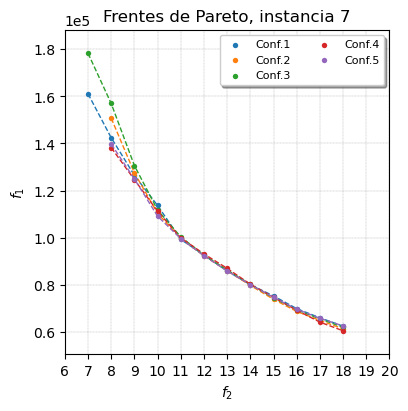

In [19]:
instance_id ='7'
instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'

fig,axs = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
frentes = []

for conf,p in enumerate(configuraciones):

    with open('Results/' + str(instance_id) + '_' + str(conf) + '.pkl', 'rb') as f:
        res = pickle.load(f) 
        f.close()
    
    instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'
    with open(instance, 'rb') as f:
        instance = pickle.load(f) 
        f.close()
    
    capacidades = instance['capacidades']
    demanda = instance['demanda']
    
    max_num_bases = np.ceil(len(demanda)/2)
    max_f1, max_f2 = [len(demanda)*9000, max_num_bases + 1]

    pf = copy(res.F)
    frentes += pf.tolist()
    
    pf[:,0] = pf[:,0]/max_f1
    pf[:,1] = pf[:,1]/max_f2
    pf = pf[pf[:,1].argsort()]
    ind = HV(ref_point=[1,1])
    print(instance_id,conf,"HV", 1-ind(pf))
    
    axs.plot(pf[:, 1]*max_f2, pf[:, 0]*max_f1,zorder=3, lw=1, ls='--')
    axs.scatter(pf[:, 1]*max_f2, pf[:, 0]*max_f1,zorder=3, lw=0, s=15,label='Conf.' + str(conf+1))

axs.set_box_aspect(1)
axs.set_xlabel('$f_2$')
axs.set_ylabel('$f_1$')
axs.set_xlim([min(np.array(frentes)[:,1])-1,max_f2])
axs.set_ylim([min(np.array(frentes)[:,0])-10000,max(np.array(frentes)[:,0])+10000])
axs.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
step = [1,2][(max_f2 > 20)*1]
axs.set_xticks([i for i in range(int(min(np.array(frentes)[:,1])-1),int(max_f2)+1,step)])
axs.set_title('Frentes de Pareto, instancia ' + instance_id)
axs.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.2)
axs.legend(ncol=2,prop = { "size": 8 }, fancybox=True, shadow=True)
fig.savefig('/home/cic/Tesis/Figuras/Results/pareto_' + instance_id + '_' + 'all.png', dpi=300)

# Combinación de frentes de Pareto

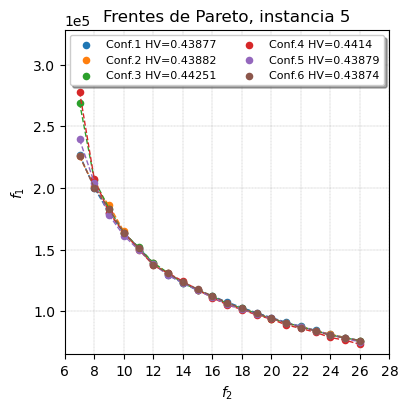

In [65]:
instance_id ='4'
instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'

fig,ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
frentes = []

with open('Results/testPerformance' + instance_id + '.pkl', 'rb') as f:
        testPerformance = pickle.load(f) 
        f.close()
hipervolumenes_v = [testPerformance[i]['hv'] for i in range(len(testPerformance))]
resultados = [testPerformance[i]['res'] for i in range(len(testPerformance))]

hv_merge = dict([i, []] for i in range(len(configuraciones)+1))
hv_pf_merge = dict([i, []] for i in range(len(configuraciones)+1))

num_samples = 20

for seed in range(num_samples):

    np.random.seed(seed*478)

    # Para cada configuración
    for conf in range(len(resultados)):
        
        # Carga la instancia
        instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'
        with open(instance, 'rb') as f:
            instance = pickle.load(f) 
            f.close()

        # Calcula los valores máximos de las funciones objetivo
        demanda = instance['demanda']
        max_num_bases = np.ceil(len(demanda)/2)
        max_f1, max_f2 = [len(demanda)*9000, max_num_bases + 1]
        
        # Selecciona 5 ejecuciones al azar
        ejecs = np.random.choice(len(resultados[conf]), 5, replace=False)
        
        # Para cada ejecución seleccionada
        frentes_conf = []
        for e in ejecs:
            
            # Selecciona el frente de Pareto
            pf = copy(resultados[conf][e].F)
            frentes_conf += pf.tolist()
        
        # Fusiona los frentes de Pareto
        frentes_ind = [(ind,vals) for ind,vals in enumerate(frentes_conf)]
        merged_ind = paretoFront(frentes_ind)
        merged = np.array([frentes_conf[i[0]] for i in merged_ind])
        merged = np.array(sorted(merged, key=lambda x: x[1]))
        
        # Normaliza los valores de las funciones objetivo
        pf = copy(merged)
        pf[:,0] = pf[:,0]/max_f1
        pf[:,1] = pf[:,1]/max_f2
        pf = pf[pf[:,1].argsort()]
        ind = HV(ref_point=[1,1])
        ihv = 1-ind(pf)

        # Guarda el valor del hipervolumen
        hv_merge[conf].append(ihv)
        hv_pf_merge[conf].append((ihv,copy(merged)))
        
        # # Grafica el frente de Pareto fusionado para esa configuración
        # ax.scatter(merged[:,1], merged[:,0], marker='o',zorder=0, lw=0, s=30,
        #             label='Conf.' + str(conf+1)+'HV='+str(round(1-ind(pf),3)))
        # ax.plot(merged[:,1], merged[:,0], '--',zorder=0, lw=1)
     
     
    conf = len(resultados)
        
    # Grafica el frente de Pareto fusionado para una ejecución de todas las configuraciones
    frentes = []
    ejecs = np.random.choice(len(resultados[0]), 5, replace=True)

    for i,e in enumerate(ejecs):
        pf = copy(resultados[i][e].F)
        frentes += pf.tolist()

    # Fusiona los frentes de Pareto
    frentes_ind = [(ind,vals) for ind,vals in enumerate(frentes)]
    merged_ind = paretoFront(frentes_ind)
    merged = np.array([frentes[i[0]] for i in merged_ind])
    merged = np.array(sorted(merged, key=lambda x: x[1]))

    # Normaliza los valores de las funciones objetivo
    pf = copy(merged)
    pf[:,0] = pf[:,0]/max_f1
    pf[:,1] = pf[:,1]/max_f2
    pf = pf[pf[:,1].argsort()]
    ind = HV(ref_point=[1,1])
    ihv = 1-ind(pf)
    
    # Guarda el valor del hipervolumen
    hv_merge[conf].append(ihv)
    hv_pf_merge[conf].append((ihv,copy(merged)))


    # # Grafica el frente de Pareto fusionado de una ejecución por configuración
    # ax.scatter(merged[:,1], merged[:,0], marker=6,zorder=0, lw=0, s=40, color='k',
    #             label='1xConf HV='+str(round(1-ind(pf),3)))
    # ax.plot(merged[:,1], merged[:,0], '--',zorder=0, lw=1)


for conf in hv_merge.keys():
    mediana = np.argsort(hv_merge[conf])[len(hv_merge[conf])//2]
    merged = hv_pf_merge[conf][mediana][1]
    hv_mediana = hv_pf_merge[conf][mediana][0]
    
    # Grafica el frente de Pareto fusionado para esa configuración
    ax.scatter(merged[:,1], merged[:,0], marker='o',zorder=0, lw=0, s=30, label='Conf.' + str(conf+1)+' HV='+str(round(hv_mediana,5)))
    ax.plot(merged[:,1], merged[:,0], '--',zorder=0, lw=1)

ax.set_box_aspect(1)
ax.set_xlabel('$f_2$')
ax.set_ylabel('$f_1$')
ax.set_xlim([min(np.array(frentes_conf)[:,1])-1,max(np.array(frentes_conf)[:,1])+2])
ax.set_ylim([min(np.array(frentes_conf)[:,0])-10000,max(np.array(frentes_conf)[:,0])+50000])
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
step = [1,2][(max(np.array(frentes_conf)[:,1])+2 > 20)*1]
ax.set_xticks([i for i in range(int(min(np.array(frentes_conf)[:,1])-1),int(max(np.array(frentes_conf)[:,1])+2)+1,step)])
ax.set_title('Frentes de Pareto, instancia ' + instance_id)
ax.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.2)
ax.legend(ncol=2,prop = { "size": 8 }, fancybox=True, shadow=True, loc='upper center')
fig.savefig('/home/cic/Tesis/Figuras/Results/p_merge_' + instance_id + '_' + 'all.png', dpi=300)

/tmp/ipykernel_11752/2619735300.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter([i+1]*len(hv_merge[i] ), hv_merge[i] ,


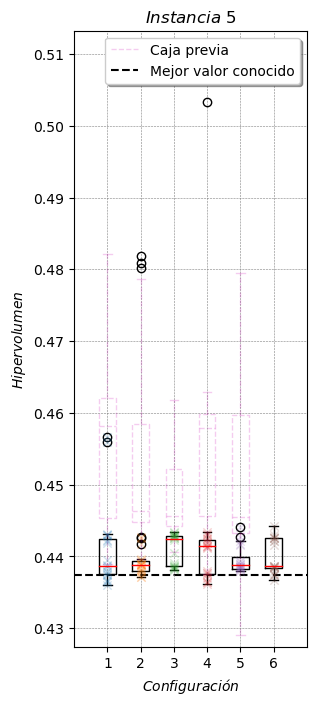

In [61]:
fig2, ax2 = plt.subplots(figsize=(3, 8))

# Ejecuciones de otras configuraciones en irace
irace = pd.read_csv('../ajuste/export/export.csv')
irace.pop('Unnamed: 0')

ejecs = irace[irace['instancename'] == 'Instance_' + instance_id]
ejecs = ejecs[ejecs['type']=='regular']
ejecs = ejecs[ejecs['value'] <= 0.99]
bkv = ejecs['bkv'].to_list()[0]

# Coordenadas x para las barras
ind = len(testPerformance)

# Ancho de las barras
ancho_barra = 0.5

hipervolumenes = [hv_merge[i] for i in range(len(hv_merge))]

ax2.boxplot(hipervolumenes,widths=ancho_barra, showfliers=True, zorder = 3, 
        medianprops=dict(color=(1,0,0,1)), )

old = (0.8,0,0.7,0.2)
bp2 = ax2.boxplot(hipervolumenes_v+[],positions= [i+1 for i in range(len(hipervolumenes_v))],
            widths=ancho_barra, showfliers=True, zorder = 3, labels=['hh']*len(hipervolumenes_v),
            boxprops=dict(color=old, ls='--'), 
            medianprops=dict(color=old, ls='--'),
            whiskerprops=dict(color=old, ls = '--'),
            capprops=dict(color=old))



for i in range(len(hv_merge)):
    ax2.scatter([i+1]*len(hv_merge[i] ), hv_merge[i] , 
            cmap='viridis', marker='x', zorder = 3, alpha=0.2, linewidths=1)

plotbkv = ax2.plot([-1,7], [bkv,bkv], '--', color='black', zorder = 0, label='Mejor valor conocido')

# Configuración de ejes y etiquetas
ax2.set_xlabel('$Configuración$')
ax2.set_ylabel('$Hipervolumen$')
ax2.set_title('$Instancia\ ' + instance_id + '$')
ax2.set_xticks([i+1 for i in range(len(hv_merge))])
ax2.set_xticklabels([f'{i+1}' for i in range(len(hv_merge))])
ax2.set_xlim([0,7])
ax2.set_ylim([bkv-0.01, np.max(hipervolumenes_v)+0.01])

ax2.legend(fancybox=True, shadow=True)
ax2.legend([bp2['boxes'][0],plotbkv[0]],['Caja previa','Mejor valor conocido'], fancybox=True, shadow=True)
ax2.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.4)

fig2.savefig('/home/cic/Tesis/Figuras/Results/testPerformance' + instance_id + '_multi.png', dpi=300, bbox_inches='tight')


    

In [22]:
frentes_ind = [(ind,vals) for ind,vals in enumerate(frentes)]
merged_ind = paretoFront(frentes_ind)
merged = np.array([frentes[i[0]] for i in merged_ind])
axs.scatter(merged[:,1], merged[:,0], marker=6, color='r',zorder=0, lw=0, s=40,label='Frente combinado')

In [23]:
kk = res.history[0]
kk.s

AttributeError: 'NSGA2' object has no attribute 's'